Summary Statistics of Larger Dataset:
               age         Medu         Fedu   traveltime    studytime  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean     16.726054     2.603448     2.387931     1.522989     1.970307   
std       1.239975     1.124907     1.099938     0.731727     0.834353   
min      15.000000     0.000000     0.000000     1.000000     1.000000   
25%      16.000000     2.000000     1.000000     1.000000     1.000000   
50%      17.000000     3.000000     2.000000     1.000000     2.000000   
75%      18.000000     4.000000     3.000000     2.000000     2.000000   
max      22.000000     4.000000     4.000000     4.000000     4.000000   

          failures       famrel     freetime        goout         Dalc  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean      0.264368     3.935824     3.201149     3.156130     1.494253   
std       0.656142     0.933401     1.031507     1.152575     0.911714   

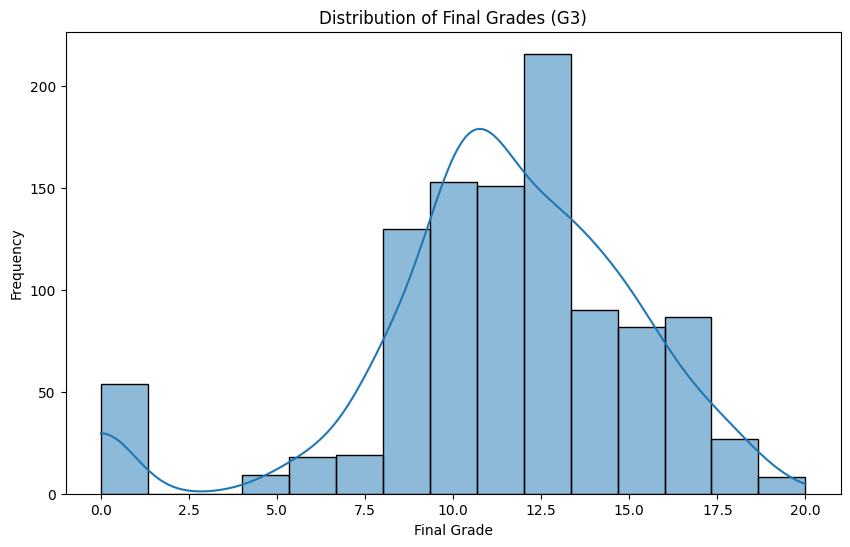

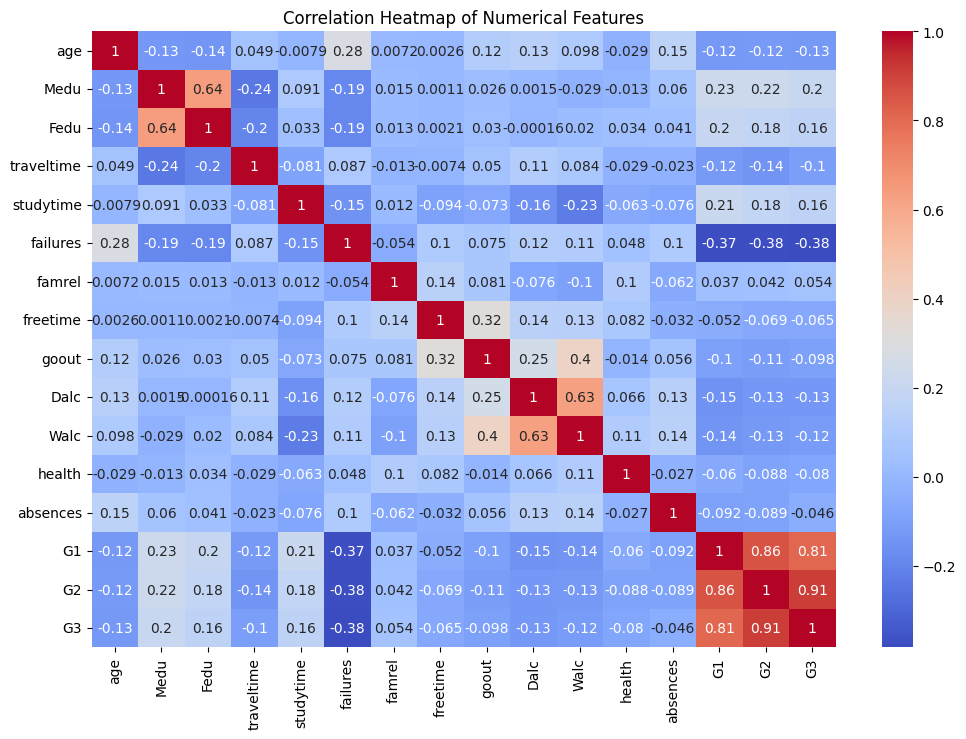

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the larger dataset (UCI Student Performance Dataset)
data_math = pd.read_csv("../../data/student-graduation/student-por.csv", sep=';')
data_por = pd.read_csv("../../data/student-graduation/student-mat.csv", sep=';')

# Combine the two datasets
data_combined = pd.concat([data_math, data_por], axis=0)

# Display basic information and summary statistics
print("Summary Statistics of Larger Dataset:")
print(data_combined.describe())
print("\nData Types and Missing Values:")
print(data_combined.info())

# Visualize distribution of final grades (G3)
plt.figure(figsize=(10, 6))
sns.histplot(data_combined['G3'], bins=15, kde=True)
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Final Grade")
plt.ylabel("Frequency")
plt.show()

# Correlation heatmap of numerical features
plt.figure(figsize=(12, 8))
numeric_data = data_combined.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Encode categorical features
data_combined = pd.get_dummies(data_combined, drop_first=True)

# Define features and target
X_large = data_combined.drop(columns=['G3'])
y_large = (data_combined['G3'] >= 10).astype(int)  # Binary classification: Pass if G3 >= 10

# Standardize features
scaler_large = StandardScaler()
X_large_scaled = scaler_large.fit_transform(X_large)

# Split data into training and validation sets
X_train_large, X_val_large, y_train_large, y_val_large = train_test_split(X_large_scaled, y_large, test_size=0.2, random_state=42)

# Define the neural network model
base_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_large.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile and train the model
base_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
base_model.fit(X_train_large, y_train_large, epochs=20, validation_data=(X_val_large, y_val_large))

# Evaluate the model
loss, accuracy = base_model.evaluate(X_val_large, y_val_large)
print(f"Validation Accuracy: {accuracy * 100:.2f}")

Epoch 1/20


c:\Users\sep_j\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3316 - loss: 0.8786 - val_accuracy: 0.7895 - val_loss: 0.5639
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7697 - loss: 0.5259 - val_accuracy: 0.8086 - val_loss: 0.4629
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8020 - loss: 0.4204 - val_accuracy: 0.8038 - val_loss: 0.3870
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8374 - loss: 0.3638 - val_accuracy: 0.8373 - val_loss: 0.3347
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8909 - loss: 0.2665 - val_accuracy: 0.8612 - val_loss: 0.2980
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9384 - loss: 0.2130 - val_accuracy: 0.8852 - val_loss: 0.2742
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9372 - loss: 0.1898 - val_accuracy: 0.8756 - val_loss: 0.2577
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9377 - loss: 0.1828 - val_accuracy: 0.8756 - val_loss: 0.2462
Epo

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model

# Load the graduation dataset
graduation_data = pd.read_csv('../../data/student-graduation/graduation_dataset.csv')
X_grad = graduation_data.drop(columns=['Target'])
y_grad = LabelEncoder().fit_transform(graduation_data['Target'])  # Encode the target variable

# Standardize the graduation data
# Assuming `scaler_large` was used to scale the larger dataset; using it here for consistency
scaler_large = StandardScaler()  # Use the same scaler if already defined; if not, define it here
X_grad_scaled = scaler_large.fit_transform(X_grad)  # fit_transform if not already fit on the larger dataset

# Split the graduation dataset into training and testing sets
X_train_grad, X_test_grad, y_train_grad, y_test_grad = train_test_split(X_grad_scaled, y_grad, test_size=0.2, random_state=42)

# Define a base model (pre-trained) - assuming this is a model that has been trained on a larger dataset
# Example of a simple model structure as a pre-trained base model
base_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_grad.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # In the larger dataset, assume this was trained as a binary classification
])

# Transfer Learning: Fine-tuning the pre-trained base model for the graduation dataset
# Unfreeze the last few layers to allow for fine-tuning on the new data
for layer in base_model.layers[-2:]:
    layer.trainable = True

# Rebuild the model with an added dropout layer and an output layer for the graduation dataset's 3 classes
transfer_model = Sequential([
    base_model,
    Dense(32, activation='relu'),  # Additional layer for increased capacity
    Dropout(0.5),                  # Dropout for regularization
    Dense(3, activation='softmax')  # Adjusted for 3 classes (dropout, enrolled, graduate)
])

# Compile the transfer model with a lower learning rate for fine-tuning
transfer_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the transfer model on the graduation dataset
transfer_model.fit(X_train_grad, y_train_grad, epochs=20, validation_data=(X_test_grad, y_test_grad), batch_size=32)

# Evaluate the model's performance on the test set
test_loss, test_accuracy = transfer_model.evaluate(X_test_grad, y_test_grad)
print(f"Test Accuracy after Transfer Learning: {test_accuracy * 100:.2f}%")


c:\Users\sep_j\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4385 - loss: 1.0820 - val_accuracy: 0.4723 - val_loss: 0.9892
Epoch 2/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4851 - loss: 0.9545 - val_accuracy: 0.4723 - val_loss: 0.8713
Epoch 3/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5910 - loss: 0.8401 - val_accuracy: 0.7277 - val_loss: 0.8307
Epoch 4/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7204 - loss: 0.8185 - val_accuracy: 0.7266 - val_loss: 0.8110
Epoch 5/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7165 - loss: 0.8064 - val_accuracy: 0.7299 - val_loss: 0.7911
Epoch 6/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7335 - loss: 0.7757 - val_accuracy: 0.7333 - val_loss: 0.7825
Epoch 7/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7173 - loss: 0.7861 - val_accuracy: 0.7356 - val_loss: 0.7732
Epoch 8/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7481 - loss: 0.7310 - val_accuracy: 0.